In [1]:
import numpy as np
import matplotlib.pyplot as plt

# First Exercise Solution

In [2]:
def fx(x):
  return np.cos(2*np.pi*x) + x**2

# derivative function
def df(x):
  return -2*np.pi*np.sin(2*np.pi*x) + 2*x

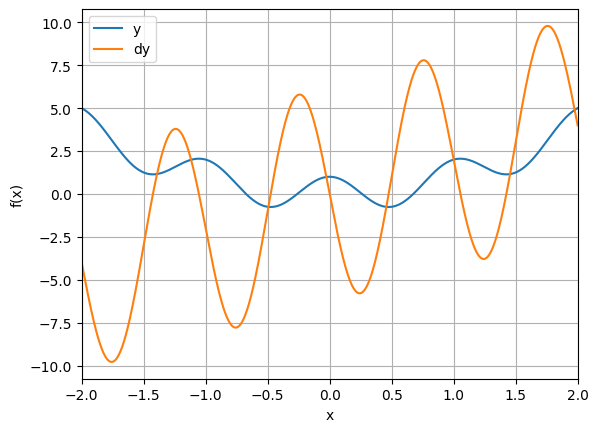

In [5]:
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,df(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [6]:
def gradient(training_epochs, learning_rate, localmin):
  for i in range(training_epochs):
    grad = df(localmin)
    localmin = localmin - learning_rate*grad
  return localmin

## staring with random number

[-0.47580245]


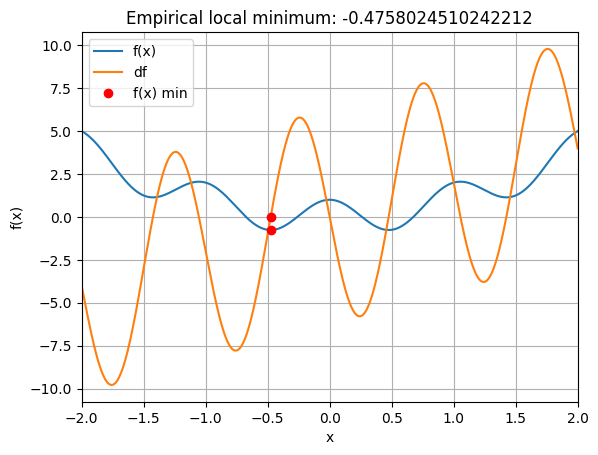

In [25]:
starting = np.random.choice(x,1)
learning_rate = 0.01
training_epochs = 100
localmin = gradient(training_epochs, learning_rate, starting)
print(localmin) ## running it multiple times, and you will notice that local minimum doesn't approach a specific value (get stuck in local minima)

# plotting it
plt.plot(x,fx(x), x,df(x))
plt.plot(localmin,df(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

## Staring with x = 0

[0.]


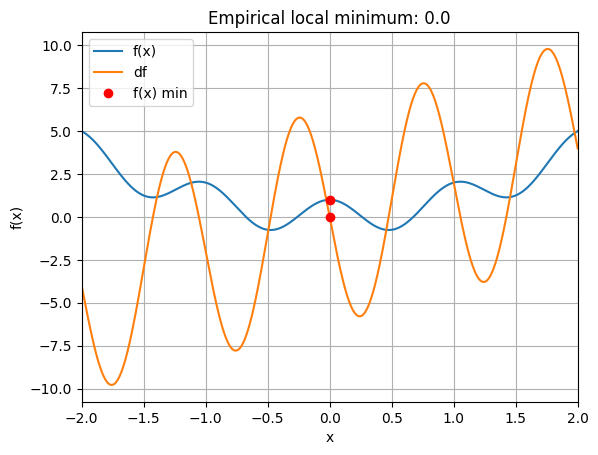

In [31]:
starting = np.array([0])
learning_rate = 0.01
training_epochs = 100
localmin = gradient(training_epochs, learning_rate, starting)
print(localmin) ## it's zero everytime, vanishing gradient occurs, because dervative = 0, and learning gets stuck at local maxima
# plotting it
plt.plot(x,fx(x), x,df(x))
plt.plot(localmin,df(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# 2nd Exercise (Gradient 2D) Solution

In [32]:
import sympy as sym # sympy to compute the partial derivative
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z


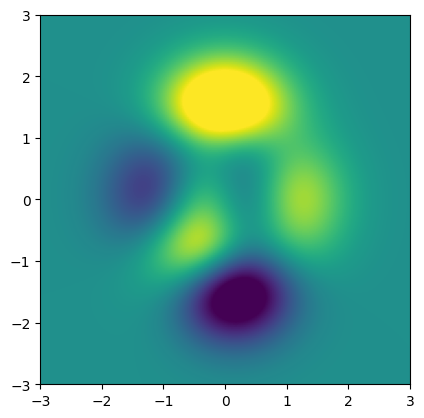

In [33]:
x = np.linspace(-3,3,201)
y = np.linspace(-3,3,201)

Z = peaks(x,y)

# let's have a look!
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show()

In [34]:
# create derivative functions using sympy

sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)


# create functions from the sympy-computed derivatives
df_x = sym.lambdify( (sx,sy),sym.diff(sZ,sx),'sympy' )
df_y = sym.lambdify( (sx,sy),sym.diff(sZ,sy),'sympy' )


Starting point is: [1.30993326 1.68565101]


In [57]:
localmax = np.random.rand(2)*4-2 # random starting point (uniform between -2 and +2)
print(f'Starting point is: {localmax}')
startpnt = localmax[:]

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = np.array([ df_x(localmax[0],localmax[1]).evalf(),
                    df_y(localmax[0],localmax[1]).evalf()
                  ])
  localmax = localmax + learning_rate*grad
  trajectory[i,:] = localmax

print(f'local max point is: {localmax}')

Starting point is: [-1.30588899 -0.50933905]
local max point is: [-0.460024518034387 -0.629196508716801]


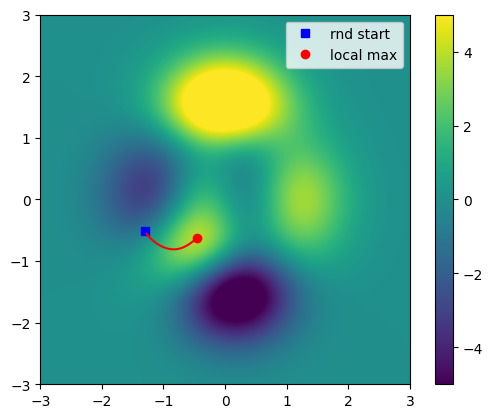

In [58]:
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(startpnt[0],startpnt[1],'bs')
plt.plot(localmax[0],localmax[1],'ro')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local max'])
plt.colorbar()
plt.show()

# Exercise 3: Dynamic Vs Fixed Learning Rate

In [65]:
x = np.linspace(-2,2,2001)

# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def df(x):
  return 6*x - 3

starting = np.array(0) # assigning constant starting value to examine the differnce between Fixed and Dynamic learning rate methods

## Fixed Learning Rate

In [66]:
localmin = starting
learning_rate = 0.01
training_epochs = 100

modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = df(localmin)
  localmin = localmin - learning_rate*grad
  modelparamsFixed[i,0] = localmin
  modelparamsFixed[i,1] = grad
  modelparamsFixed[i,2] = learning_rate

## Using a gradient-based learning rate

In [67]:
localmin = starting
learning_rate = 0.01
training_epochs = 100

modelparamsGrad = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = df(localmin)
  learning_dynamic = learning_rate*np.abs(grad)
  localmin = localmin - learning_dynamic*grad
  modelparamsGrad[i,0] = localmin
  modelparamsGrad[i,1] = grad
  modelparamsGrad[i,2] = learning_dynamic

## Using a time-based learning rate



In [68]:
localmin = starting
learning_rate = 0.1
training_epochs = 100

modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
  grad = df(localmin)
  lr = learning_rate*(1-(i+1)/training_epochs)
  localmin = localmin - lr*grad
  modelparamsTime[i,0] = localmin
  modelparamsTime[i,1] = grad
  modelparamsTime[i,2] = lr

## Plotting the Result

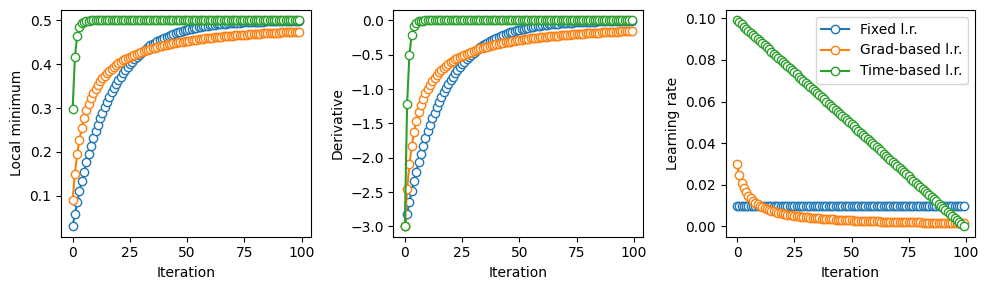

In [69]:
fig,ax = plt.subplots(1,3,figsize=(10,3))

# generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
  ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()